<a href="https://colab.research.google.com/github/DS-17-Projects-Tracking/NMPEDdata/blob/main/Unpack_NMPED_Full_Set_Attendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TO DO


1. ✅Glob the files and sort into lists by performance metric
1. ✅Build df dictionaries for each performance metric
1. 🟡 Compile data tables in one master per performance metric
  1. Attendance  ✅2019-2020, ✅2020-2021, ✅2021-2022, ✅2022-2023, 2023-2024
  1. 🟡 Graduation
1. ❗ School Directory update
1. 🟡 Export usable datasets to GitHub

[✅ Complete] ---
[🟡 In progress] ---
[❗ Backlog]

In [1]:
#.style.set_sticky(axis="columns")

In [2]:
from google.colab import drive
import pandas as pd
import re
import glob
import numpy as np

# ✅ Glob the files and sort into lists by performance metric

In [3]:
base_path = '/content/drive/MyDrive/CNMDDDS/capstone/NMPED full set/2019-20 to 2024-25 Grad Rates, Attendance, Proficiency.zip (Unzipped Files)'
files_all = glob.glob(base_path + '*/**', recursive=True)
file_names = [files.split('(Unzipped Files)')[1] for files in files_all]

In [4]:
prof_list = []
grad_list = []
attend_list = []
data_dict_list = []

for x in file_names:
  if 'Data' in x:
    data_dict_list += [x]
  elif 'Proficiency' in x:
    prof_list += [x]
  elif 'Grad' in x:
    grad_list += [x]
  elif 'Attend' in x:
    attend_list += [x]

In [5]:
prof_list
grad_list
attend_list
data_dict_list

['/2022-23/Data Dictionaries',
 '/2022-23/Data Dictionaries/Data Dictionary Regular Attendance File V20240229 KF.xlsx',
 '/2022-23/Data Dictionaries/DSRC SY 2022-23, Proficiency Data Dictionary, V.2024.02.21.xlsx',
 '/2023-24/Data Dictionary',
 '/2023-24/Data Dictionary/Proficiency Data Dictionary.xlsx']

# ✅ Build df dictionaries for each performance metric

## Data dictionary

In [6]:
df = pd.DataFrame()
data_dict = {}
for x in data_dict_list:
  acadyear = x.split('/')[1]
  year = int(acadyear.split('-')[0]) + 1
  subject ="".join(re.findall('Proficiency|Attendance',x))
  if x.endswith('.xlsx'):
    df = pd.read_excel(base_path + x)
    df_name = f'{subject}_{year}data_dict'
    data_dict[df_name] =df
  if x.endswith('.csv'):
    df = pd.read_csv(base_path + x)
    df_name = f'{subject}_{year}data_dict'
    data_dict[df_name] =df

In [7]:
data_dict['Attendance_2023data_dict']

,Variable Name,Type,Width,Decimals,Description
0,Schnum,Numeric,6,0,Entity school number
1,Denominator_Attendance90_All,Numeric,7,0,All students in denominator
2,Numerator_Attendance90_All,Numeric,8,2,Number of all students who are regular attenders
3,Attendance90_All,Numeric,5,1,Percent of all students who are regular attenders
4,Denominator_Attendance90_Female,Numeric,7,0,All female students in denominator
...,...,...,...,...,...
65,Numerator_Attendance90_Any_Native,Numeric,8,2,Number of students who are identified as Any N...
66,Attendance90_Any_Native,Numeric,5,1,Percent of Any Native students who are Regular...
67,Denominator_Attendance90_Any_Black,Numeric,7,0,All students who are identified as Any Black i...
68,Numerator_Attendance90_Any_Black,Numeric,8,2,Number of students who are identified as Any B...


##Attendance data

In [8]:
attend_list

['/2021-22/School/Regular Attendance SY 2021-22 for NM Vistas, Masked.xlsx',
 '/2021-22/District/DSRC SY 2021-22, Regular Attendance, Masked.xlsx',
 '/2022-23/Vistas SY 2022-23, Regular Attendance, V20240228 KF_MASKED.csv',
 '/2022-23/Vistas SY 2022-23, Regular Attendance, V20240228 KF_MASKED.gsheet',
 '/2019-20/SY 2019-20, AMD, Regular Attendance, 20250327DW Masked.csv',
 '/2020-21/SY 2020-21, AMD, Regular Attendance, 20250327DW Masked.csv',
 '/2023-24/SY 2023-24, Regular Attendance Rate, FINAL 20241106 SH Masked.csv',
 '/2023-24/SY 2023-24, Regular Attendance Rate, FINAL 20241106 SH Masked.gsheet']

In [9]:
attend_df_dict = {}

for x in attend_list:
  acadyear = x.split('/')[1]
  year = int(acadyear.split('-')[0]) + 1
  df_name = f'attend_{year}_df'
  if x.endswith('.xlsx'):
    df = pd.read_excel(base_path + x)
  if x.endswith('.csv'):
    df = pd.read_csv(base_path + x)
  df['SY'] = acadyear
  df['Year'] = year
  attend_df_dict[df_name] = df

Add 2021-2022 school data to 2022 frame

In [10]:
path = '/2021-22/District/DSRC SY 2021-22, Regular Attendance, Masked.xlsx'
acadyear = path.split('/')[1]
year = int(acadyear.split('-')[0]) + 1
df_name = f'attend_{year}_dist_df'
if path.endswith('.xlsx'):
  df = pd.read_excel(base_path + path)
df['SY'] = acadyear
df['Year'] = year
attend_df_dict[df_name] = df

In [11]:
path = '/2021-22/School/Regular Attendance SY 2021-22 for NM Vistas, Masked.xlsx'
acadyear = path.split('/')[1]
year = int(acadyear.split('-')[0]) + 1
df_name = f'attend_{year}_school_df'
if path.endswith('.xlsx'):
  df = pd.read_excel(base_path + path)
df['SY'] = acadyear
df['Year'] = year
attend_df_dict[df_name] = df

In [12]:
attend_df_dict['attend_2022_dist_df'].shape, attend_df_dict['attend_2022_school_df'].shape

((143, 68), (871, 18))

## Graduation Data

In [13]:
grad_list

['/2021-22/School/Graduation 6Y SY 2021-22 for NM Vistas, Masked.xlsx',
 '/2021-22/School/Graduation 5Y SY 2021-22 for NM Vistas, Masked.xlsx',
 '/2021-22/School/Graduation 4Y SY 2021-22 for NM Vistas, Masked.xlsx',
 '/2021-22/District/Graduation 5Y 2021-22 minus Points _ Designations, Masked.xlsx',
 '/2021-22/District/Graduation 4Y 2021-22 minus Points _ Designations, Masked.xlsx',
 '/2021-22/District/Graduation 6Y 2021-22 minus Points _ Designations, Masked.xlsx',
 '/2024-25/SY 2024-25, AMD, Grad Rate 5-yr, 20250326DW Masked.csv',
 '/2024-25/SY 2024-25, AMD, Grad Rate 6-yr, 20250326DW Masked.csv',
 '/2024-25/SY 2024-25, AMD, Grad Rate 4-yr, 20250326DW Masked.csv',
 '/2024-25/SY 2024-25, AMD, Grad Rate 4-yr, 20250326DW Masked.gsheet',
 '/2022-23/Graduation 4Y minus Points & Designations SY 2022-23_MASKED.csv',
 '/2022-23/Graduation 6Y minus Points & Designations SY 2022-23 AÁ_MASKED.csv',
 '/2022-23/Graduation 5Y minus Points & Designations SY 2022-23 AÁ_MASKED.csv',
 '/2019-20/SY 2

In [14]:
grad_df_dict = {}

for x in grad_list:
  acadyear = x.split('/')[1]
  year = int(acadyear.split('-')[0]) + 1
  cohort = re.findall(r'\b[456]\w*\b', x)
  for entry in cohort:
    if not entry.endswith('Y'):
      entry += 'Y'
  df_name = f'{entry}grad_{year}_df'
  # print(df_name)
  if x.endswith('.xlsx'):
    df = pd.read_excel(base_path + x)
  if x.endswith('.csv'):
    df = pd.read_csv(base_path + x)
  df['SY'] = acadyear
  df['Cohort'] = entry
  df['Year'] = year
  grad_df_dict[df_name] = df

In [15]:
grad_df_dict['6Ygrad_2022_df']

,SY,DistCode,SchNumb,District,School,Grads.6Y.1.All,Grads.6Y.2.Female,Grads.6Y.3.Male,Grads.6Y.4.Hispanic,Grads.6Y.5.White,...,Graduation.6Y.14.SwD,Graduation.6Y.15.NonSwD,Graduation.6Y.16.EL,Graduation.6Y.17.NonEL,Graduation.6Y.18.Migrant,Graduation.6Y.19.Homeless,Graduation.6Y.20.Military,Graduation.6Y.21.Foster,Cohort,Year
0,2021-22,1,1,ALBUQUERQUE,ALBUQUERQUE DIST OFFICE,5390.0,2760.1,2629.9,3512.3,1212.6,...,.86,.89,.89,.89,*****,.90,≥ 90,*****,6Y,2022
1,2021-22,2,2,RESERVE,RESERVE DISTRICT OFFICE,8.28,*****,6.03,*****,*****,...,*****,*****,NaN,*****,NaN,NaN,NaN,*****,6Y,2022
2,2021-22,3,3,QUEMADO,QUEMADO DISTRICT OFFICE,11.46,7.13,*****,*****,7.34,...,*****,≥ 80,NaN,≥ 80,NaN,NaN,NaN,*****,6Y,2022
3,2021-22,4,4,ROSWELL,ROSWELL DISTRICT OFFICE,519.33,283.81,235.52,358.00,149.83,...,.59,.77,.79,.74,*****,*****,*****,*****,6Y,2022
4,2021-22,5,5,HAGERMAN,HAGERMAN DIST OFFICE,23.74,11.05,12.69,17.74,*****,...,*****,≥ 80,*****,.80,*****,*****,NaN,*****,6Y,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2021-22,565,565001,TIERRA ENCANTADA CHARTER SCHOOL,TIERRA ENCANTADA CHARTER SCHOOL,41.79,16.03,25.76,36.04,*****,...,*****,.81,.88,.82,NaN,NaN,NaN,*****,6Y,2022
343,2021-22,567,567001,LAS MONTANAS CHARTER,LAS MONTANAS CHARTER,21.75,15.21,6.53,20.88,*****,...,*****,.66,*****,.66,*****,*****,NaN,*****,6Y,2022
344,2021-22,578,578001,MIDDLE COLLEGE HIGH SCHOOL CHARTER - GALLUP,MIDDLE COLLEGE HIGH SCHOOL CHARTER - GALLUP,*****,*****,*****,NaN,NaN,...,NaN,*****,*****,*****,NaN,NaN,NaN,*****,6Y,2022
345,2021-22,585,585001,VISTA GRANDE HIGH SCHOOL,VISTA GRANDE HIGH SCHOOL,14.06,8.09,*****,10.78,*****,...,*****,.49,*****,.58,NaN,*****,NaN,*****,6Y,2022


##Proficiency Data

In [16]:
prof_list

['/2021-22/School/Proficiency SY 2021-22 for NM Vistas, Masked.xlsx',
 '/2021-22/District/DSRC SY 2021-22, Proficiency, Science. Attenuated, Masked.xlsx',
 '/2021-22/District/DSRC SY 2021-22, Proficiency, Math, Attenuated, Masked.xlsx',
 '/2021-22/District/DSRC SY 2021-22, Proficiency, ELA, Attenuated, Masked.xlsx',
 '/2022-23/DSRC SY 2022-23, Proficiency, MATH, Attenuated, V.2024.02.21 DW_MASKED.csv',
 '/2022-23/DSRC SY 2022-23, Proficiency, SCIENCE, Attenuated, V.2024.02.21 DW_MASKED.csv',
 '/2022-23/DSRC SY 2022-23, Proficiency, ELA, Attenuated, V.2024.02.21 DW_MASKED.csv',
 '/2023-24/SY 2023-24, AMD, Proficiency, Science Masked 20250313 SH.xlsx',
 '/2023-24/SY 2023-24, Proficiency LA Final, 20241106 SH Masked.csv',
 '/2023-24/SY 2023-24, Proficiency Math Final, 20241106 SH Masked.csv',
 '/2023-24/SY 2023-24, Proficiency Math Final, 20241106 SH Masked.gsheet']

In [17]:
prof_df_dict = {}

for x in prof_list:
  acadyear = x.split('/')[1]
  year = int(acadyear.split('-')[0]) + 1
  assessments = " ".join(re.findall('School|MATH|SCIENCE|LA|Math|Science|ELA', x)).lower()
  df_name = f'{assessments}_proficiencies_{year}_df'
  if x.endswith('.xlsx'):
    df = pd.read_excel(base_path + x)
  if x.endswith('.csv'):
    df = pd.read_csv(base_path + x)
  df['SY'] = acadyear
  df['Year'] = year
  prof_df_dict[df_name] = df

In [18]:
for k,v in prof_df_dict.items():
  print(v.shape, k)

(894, 36) school_proficiencies_2022_df
(143, 73) science_proficiencies_2022_df
(999, 73) math_proficiencies_2022_df
(143, 73) ela_proficiencies_2022_df
(961, 121) math_proficiencies_2023_df
(933, 121) science_proficiencies_2023_df
(983, 121) ela_proficiencies_2023_df
(927, 191) science_proficiencies_2024_df
(977, 184) la_proficiencies_2024_df
(957, 184) math_proficiencies_2024_df


##Check what is in each dictionary

In [19]:
attend_df_dict.keys()

dict_keys(['attend_2022_df', 'attend_2023_df', 'attend_2020_df', 'attend_2021_df', 'attend_2024_df', 'attend_2022_dist_df', 'attend_2022_school_df'])

In [20]:
grad_df_dict.keys()

dict_keys(['6Ygrad_2022_df', '5Ygrad_2022_df', '4Ygrad_2022_df', '5Ygrad_2025_df', '6Ygrad_2025_df', '4Ygrad_2025_df', '4Ygrad_2023_df', '6Ygrad_2023_df', '5Ygrad_2023_df', '4Ygrad_2020_df', '5Ygrad_2020_df', '6Ygrad_2020_df', '4Ygrad_2021_df', '5Ygrad_2021_df', '6Ygrad_2021_df', '5Ygrad_2024_df', '6Ygrad_2024_df', '4Ygrad_2024_df'])

In [21]:
prof_df_dict.keys()

dict_keys(['school_proficiencies_2022_df', 'science_proficiencies_2022_df', 'math_proficiencies_2022_df', 'ela_proficiencies_2022_df', 'math_proficiencies_2023_df', 'science_proficiencies_2023_df', 'ela_proficiencies_2023_df', 'science_proficiencies_2024_df', 'la_proficiencies_2024_df', 'math_proficiencies_2024_df'])

In [22]:
data_dict.keys()

dict_keys(['Attendance_2023data_dict', 'Proficiency_2023data_dict', 'Proficiency_2024data_dict'])

# 🟡 Compile data tables in one master per performance metric

In [23]:
filter = attend_df_dict['attend_2023_df']['SchNumb'] == 1520
attend_df_dict['attend_2023_df'][filter]

,DistrictNumber,SchNumb,Attendance.1.All,Attendance.2.Female,Attendance.3.Male,Attendance.4.Hispanic,Attendance.5.White,Attendance.6.Black,Attendance.7.Asian,Attendance.8.Native,...,Denominator.Attendance.16.EL,Denominator.Attendance.17.NotEL,Denominator.Attendance.18.Migrant,Denominator.Attendance.19.Homeless,Denominator.Attendance.20.Military,Denominator.Attendance.21.Foster,Denominator.Attendance.22.AnyNative,Denominator.Attendance.23.AnyBlack,SY,Year
142,1,1520,0.54,0.5,0.57,0.54,0.54,0.59,0.59,0.52,...,466,732,,118,32,*****,140,140,2022-23,2023


## Attendance

### Reshape Highland High Draft
Melted wide data set to long, then pivot to mid

In [24]:
highland_df = attend_df_dict['attend_2023_df'][filter]

In [25]:
highland_df

,DistrictNumber,SchNumb,Attendance.1.All,Attendance.2.Female,Attendance.3.Male,Attendance.4.Hispanic,Attendance.5.White,Attendance.6.Black,Attendance.7.Asian,Attendance.8.Native,...,Denominator.Attendance.16.EL,Denominator.Attendance.17.NotEL,Denominator.Attendance.18.Migrant,Denominator.Attendance.19.Homeless,Denominator.Attendance.20.Military,Denominator.Attendance.21.Foster,Denominator.Attendance.22.AnyNative,Denominator.Attendance.23.AnyBlack,SY,Year
142,1,1520,0.54,0.5,0.57,0.54,0.54,0.59,0.59,0.52,...,466,732,,118,32,*****,140,140,2022-23,2023


In [26]:
# list(enumerate(highland_df.columns))[2:]

In [27]:
long_highland_df = highland_df.melt(id_vars = ['SchNumb','SY','Year'], value_vars = highland_df.columns[2:])
long_highland_df

,SchNumb,SY,Year,variable,value
0,1520,2022-23,2023,Attendance.1.All,0.54
1,1520,2022-23,2023,Attendance.2.Female,0.5
2,1520,2022-23,2023,Attendance.3.Male,0.57
3,1520,2022-23,2023,Attendance.4.Hispanic,0.54
4,1520,2022-23,2023,Attendance.5.White,0.54
...,...,...,...,...,...
64,1520,2022-23,2023,Denominator.Attendance.19.Homeless,118
65,1520,2022-23,2023,Denominator.Attendance.20.Military,32
66,1520,2022-23,2023,Denominator.Attendance.21.Foster,*****
67,1520,2022-23,2023,Denominator.Attendance.22.AnyNative,140


In [28]:
long_highland_df['A']=long_highland_df['variable'].str.split('.').apply(lambda x : x[0])
long_highland_df['Subgroup']=long_highland_df['variable'].str.split('.').apply(lambda x : x[-1])
long_highland_df.head(3)

,SchNumb,SY,Year,variable,value,A,Subgroup
0,1520,2022-23,2023,Attendance.1.All,0.54,Attendance,All
1,1520,2022-23,2023,Attendance.2.Female,0.5,Attendance,Female
2,1520,2022-23,2023,Attendance.3.Male,0.57,Attendance,Male


In [29]:
dropfilter = long_highland_df['A'] == 'Numerator'
long_highland_df = long_highland_df[~dropfilter]
long_highland_df.head(3)

,SchNumb,SY,Year,variable,value,A,Subgroup
0,1520,2022-23,2023,Attendance.1.All,0.54,Attendance,All
1,1520,2022-23,2023,Attendance.2.Female,0.5,Attendance,Female
2,1520,2022-23,2023,Attendance.3.Male,0.57,Attendance,Male


In [30]:
foo = (
long_highland_df
  .replace({'Attendance': 'Regular_Attendance_Rate', 'Denominator': 'Number_Attending'})
  .pivot(index=['SchNumb','Subgroup','SY', 'Year'], columns=['A'], values=['value'])
)
foo.columns = [x[1] for x in foo.columns]
mid_highland_df = foo.reset_index()
mid_highland_df.head()

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
0,1520,All,2022-23,2023,1198,0.54
1,1520,AnyBlack,2022-23,2023,140,0.54
2,1520,AnyNative,2022-23,2023,140,0.51
3,1520,Asian,2022-23,2023,37,0.59
4,1520,Black,2022-23,2023,83,0.59


In [31]:
mid_highland_df['Subgroup'].value_counts() ## Drop Any and Not subgroups

,count
Subgroup,
All,1
AnyBlack,1
AnyNative,1
Asian,1
Black,1
DirectCert,1
EL,1
FRL,1
Female,1


In [32]:
column_order = mid_highland_df.columns
column_order

Index(['SchNumb', 'Subgroup', 'SY', 'Year', 'Number_Attending',
       'Regular_Attendance_Rate'],
      dtype='object')

In [33]:
attend_df_dict['attend_2021_df'] = attend_df_dict['attend_2021_df'][column_order]
filter = attend_df_dict['attend_2021_df']['SchNumb'] == 1520
attend_df_dict['attend_2021_df'][filter].head()

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
4862,1520,All,2020-21,2021,1085,70.78
4863,1520,Female,2020-21,2021,518,76.45
4864,1520,Male,2020-21,2021,513,65.50
4865,1520,White,2020-21,2021,100,79.00
4866,1520,Black,2020-21,2021,82,76.83


In [34]:
attend_df_dict['attend_2021_df'][filter]['Subgroup'].value_counts()

,count
Subgroup,
All,1
Female,1
Male,1
White,1
Black,1
Hispanic,1
Asian,1
Native,1
Multirace,1


In [35]:
attend_df_dict['attend_2021_df'].head()

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
0,1,All,2020-21,2021,80466,74.19
1,1,Female,2020-21,2021,36376,75.59
2,1,Male,2020-21,2021,37369,73.15
3,1,White,2020-21,2021,14455,85.02
4,1,Black,2020-21,2021,1793,67.71


### Reorganize dataframes to be standard shape and content

1. melt
1. split labels to new cols (Attendance.1.All --> Attendance and All)
1. rename subgroup col
1. filter if needed
1. replace.rename other columns then pivot
1. reset column order

In [36]:
# for k,v in attend_df_dict.items():
#   print(k,v.columns)

In [37]:
attend_df_dict.keys()
cleaned_attend_df_dict = {}

#### ✅Reorganize existing columns for 2019-2020 and 2020-2021

In [38]:
# Matching already just reorder to matching columns: attend_2020_df, attend_2021_df
column_order
# attend_df_dict['attend_2021_df'][column_order]
cleaned_attend_df_dict['attend_2021_df'] = attend_df_dict['attend_2021_df'][column_order]
cleaned_attend_df_dict['attend_2020_df'] = attend_df_dict['attend_2020_df'][column_order]
cleaned_attend_df_dict['attend_2021_df'].columns, cleaned_attend_df_dict['attend_2020_df'].columns

(Index(['SchNumb', 'Subgroup', 'SY', 'Year', 'Number_Attending',
        'Regular_Attendance_Rate'],
       dtype='object'),
 Index(['SchNumb', 'Subgroup', 'SY', 'Year', 'Number_Attending',
        'Regular_Attendance_Rate'],
       dtype='object'))

#### ✅Clean Attendance 2021-2022

In [39]:
# Mostly wide dfs: attend_2022_df, attend_2023_df

In [40]:
# melt
df = attend_df_dict['attend_2022_dist_df'].copy()
df.drop(['School','District'], axis = 1, inplace= True)
df.rename({'DistCode':'SchNumb'}, axis = 1, inplace = True)
df.head()
long_df = df.melt(id_vars = ['SchNumb','SY','Year'], value_vars = df.columns[2:-1])

# split labels to new cols (Attendance.1.All --> Attendance and All)
long_df['A']=long_df['variable'].str.split('.').apply(lambda x : x[0])
long_df['Subgroup']=long_df['variable'].str.split('.').apply(lambda x : x[-1])
# # filter Numerator if needed
dropfilter = long_df['A'] == 'Numerator_Attendance'
long_df = long_df[~dropfilter]
long_df.head()
# replace.rename other columns then pivot
foo = (
long_df
  .replace({'Attendance': 'Regular_Attendance_Rate', 'Denominator_Attendance': 'Number_Attending'})
  .pivot(index=['SchNumb','Subgroup','SY', 'Year'], columns=['A'], values=['value'])
)
foo.columns = [x[1] for x in foo.columns]
mid_df = foo.reset_index()
mid_df.head()

# reset column order
mid_df = mid_df[column_order]
cleaned_attend_df_dict['attend_2022_dist_df'] = mid_df
cleaned_attend_df_dict['attend_2022_dist_df'].head()

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
0,1,All,2021-22,2022,86974,.55
1,1,Asian,2021-22,2022,2656,.71
2,1,Black,2021-22,2022,3890,.52
3,1,DirectCert,2021-22,2022,34960,.40
4,1,EL,2021-22,2022,17985,.50


In [41]:
# melt
df = attend_df_dict['attend_2022_school_df'].copy()
df.drop(['School','DistCode','District','LongitID','HS','T1'], axis = 1, inplace= True)
long_df = df.melt(id_vars = ['SchNumb','SY','Year'], value_vars = df.columns[1:-2])

# split labels to new cols (Attendance.1.All --> Attendance and All)
long_df['A']=long_df['variable'].str.split('.').apply(lambda x : x[0])
long_df['Subgroup']=long_df['variable'].str.split('.').apply(lambda x : x[-1])
long_df
# replace.rename other columns then pivot
foo = (
long_df
  .replace({'Attendance': 'Regular_Attendance_Rate', 'Denominator_Attendance': 'Number_Attending'})
  .pivot(index=['SchNumb','Subgroup','SY', 'Year'], columns=['A'], values=['value'])
)
foo.columns = [x[1] for x in foo.columns]
mid_df = foo.reset_index()
mid_df['Number_Attending'] = np.nan

# # reset column order
mid_df = mid_df[column_order]
mid_df
cleaned_attend_df_dict['attend_2022_school_df'] = mid_df
cleaned_attend_df_dict['attend_2022_school_df'].head()

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
0,1006,All,2021-22,2022,NaN,.67
1,1006,Asian,2021-22,2022,NaN,NaN
2,1006,Black,2021-22,2022,NaN,*****
3,1006,EL,2021-22,2022,NaN,.67
4,1006,FRL,2021-22,2022,NaN,.67


#### ✅Clean Attendance 2022-2023

In [42]:
All_filter = [x for x in attend_df_dict['attend_2023_df'].columns if x.endswith('All')]
attend_df_dict['attend_2023_df'][['SchNumb']+ All_filter]

,SchNumb,Attendance.1.All,Numerator.Attendance.1.All,Denominator.Attendance.1.All
0,1000,0.72,56,78
1,1006,0.58,273,472
2,1016,0.48,76,160
3,1017,0.33,42,129
4,1024,0.91,343,376
...,...,...,...,...
995,582,0.62,72,117
996,583,0.61,55,90
997,584,0.49,843,1717
998,585,0.62,46,74


In [43]:
# melt
df = attend_df_dict['attend_2023_df'].copy()
df.drop('DistrictNumber', axis = 1, inplace = True)
long_df = df.melt(id_vars = ['SchNumb','SY','Year'], value_vars = df.columns[1:-2])
# split labels to new cols (Attendance.1.All --> Attendance and All)
long_df['A']=long_df['variable'].str.split('.').apply(lambda x : x[0])
long_df['Subgroup']=long_df['variable'].str.split('.').apply(lambda x : x[-1])

# # filter Numerator if needed
dropfilter = long_df['A'] == 'Numerator'
long_df = long_df[~dropfilter]
long_df
# replace.rename other columns then pivot
foo = (
long_df
  .replace({'Attendance': 'Regular_Attendance_Rate', 'Denominator': 'Number_Attending'})
  .pivot(index=['SchNumb','Subgroup','SY', 'Year'], columns=['A'], values=['value'])
)
foo.columns = [x[1] for x in foo.columns]
mid_df = foo.reset_index()
mid_df.head()

# reset column order
mid_df = mid_df[column_order]
# mid_df.head()
cleaned_attend_df_dict['attend_2023_df'] = mid_df
cleaned_attend_df_dict['attend_2023_df'][cleaned_attend_df_dict['attend_2023_df']['Subgroup'] == 'All']

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
0,1,All,2022-23,2023,84717,0.63
23,2,All,2022-23,2023,98,0.73
46,3,All,2022-23,2023,167,0.58
69,4,All,2022-23,2023,9992,0.57
92,5,All,2022-23,2023,404,0.58
...,...,...,...,...,...,...
22885,582001,All,2022-23,2023,117,0.62
22908,583001,All,2022-23,2023,90,0.61
22931,584001,All,2022-23,2023,1717,0.49
22954,585001,All,2022-23,2023,74,0.62


#### ✅2023-2024 long data but differently long
How you may ask? Let's find out

In [44]:
# Different wide dfs: attend_2024_df
df = attend_df_dict['attend_2024_df'].copy()
df.head()
# df[['SY2024_Accountable_Entity','Disnum','SchNumb','School']][0:5]  #Districts have no SchNumb but have a disnum
# df[['SY2024_Accountable_Entity','Disnum','SchNumb','School']][285:290] #Schools have a SchNumb but no disnum
# df[['SY2024_Accountable_Entity','Disnum','SchNumb']].isna().sum() # No nulls in Accountable_Entity... so lets keep that
df = df.drop(['Disnum','SchNumb','School','District'], axis = 1).rename({'SY2024_Accountable_Entity':'SchNumb'},axis = 1)

for x in df.columns:
  if 'Any' in x:
    df.drop(x, axis= 1, inplace = True)

drop_cols= ['AttendRate','NChronicRate','Attend_rate','Chronic','NAttend', 'Attend','ChronicRate']
for x in df.columns:
  if x.split('_')[0] in drop_cols:
    df.drop(x, axis = 1, inplace = True)

df.columns = list(df.columns[0:21]) + [f'total_{i}' for i in df.columns[21:-2]] +list(df.columns[-2:])
df

,SchNumb,Attendace_All,Attendace_Female,Attendace_Male,Attendace_Hispanic,Attendace_White,Attendace_Black,Attendace_Asian,Attendace_Native,Attendace_Multirace,...,total_NotDirectCert,total_SwD,total_NotSwD,total_EL,total_NotEL,total_Migrant,total_Homeless,total_Military,SY,Year
0,1,0.50879675,0.50617099,0.51131105,0.46595949,0.5113343,0.48543382,0.68304205,0.3920556,0.54336852,...,28043,15910,53434,18094,49481,*****,1863,12,2023-24,2024
1,2,≥ .95,≥ .90,≥ .95,≥ .90,≥ .95,*****,*****,*****,*****,...,64,15,62,*****,*****,*****,*****,*****,2023-24,2024
2,3,0.625,0.59740257,0.6506024,0.62857145,0.64963502,*****,*****,*****,0.5,...,92,31,129,*****,*****,*****,38,*****,2023-24,2024
3,4,0.63420993,0.62430942,0.64384204,0.61445022,0.54303753,0.54651165,≥ .80,0.42857143,0.5714286,...,3246,1505,6937,1246,7190,12,74,20,2023-24,2024
4,5,0.85760516,0.88709676,0.83783782,0.85892117,0.85526317,*****,*****,*****,*****,...,206,61,248,88,221,*****,*****,*****,2023-24,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,583001,0.90697676,0.88461536,0.94117647,0.90721649,0.90178573,*****,*****,*****,*****,...,61,29,100,20,*****,*****,*****,*****,2023-24,2024
980,584001,0.81824368,0.81070983,0.82732731,0.79209042,0.81556684,0.88235295,≥ .80,0.8347826,0.78181821,...,841,341,1128,85,1353,*****,*****,19,2023-24,2024
981,585001,0.90163934,0.8611111,≥ .90,0.86486489,0.89130437,*****,*****,≥ .80,*****,...,38,19,42,*****,*****,*****,*****,*****,2023-24,2024
982,586001,0.83333331,0.82300884,0.84105963,0.80530971,0.83177572,≥ .80,*****,*****,0.8888889,...,225,36,228,*****,*****,*****,*****,18,2023-24,2024


In [45]:
# melt
long_df = df.melt(id_vars = ['SchNumb','SY','Year'], value_vars = df.columns[1:-2])

# split labels to new cols (Attendance.1.All --> Attendance and All)
long_df['A']=long_df['variable'].str.split('_').apply(lambda x : x[0])
long_df['Subgroup']=long_df['variable'].str.split('_').apply(lambda x : x[-1])

# replace.rename other columns then pivot
foo = (long_df
  .replace({'Attendace': 'Regular_Attendance_Rate', 'total': 'Number_Attending'})
  .pivot(index=['SchNumb','Subgroup','SY', 'Year'], columns=['A'], values=['value'])
)

foo.columns = [x[1] for x in foo.columns]
mid_df = foo.reset_index()
mid_df.head()

# # reset column order
mid_df = mid_df[column_order]
mid_df.head()
cleaned_attend_df_dict['attend_2024_df'] = mid_df
cleaned_attend_df_dict['attend_2024_df'].head()

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
0,1,All,2023-24,2024,69344,0.50879675
1,1,Asian,2023-24,2024,2117,0.68304205
2,1,Black,2023-24,2024,3158,0.48543382
3,1,DirectCert,2023-24,2024,41301,0.43848819
4,1,EL,2023-24,2024,18094,0.44528574


In [46]:
[(k, v.columns) for k, v in cleaned_attend_df_dict.items()]

[('attend_2021_df',
  Index(['SchNumb', 'Subgroup', 'SY', 'Year', 'Number_Attending',
         'Regular_Attendance_Rate'],
        dtype='object')),
 ('attend_2020_df',
  Index(['SchNumb', 'Subgroup', 'SY', 'Year', 'Number_Attending',
         'Regular_Attendance_Rate'],
        dtype='object')),
 ('attend_2022_dist_df',
  Index(['SchNumb', 'Subgroup', 'SY', 'Year', 'Number_Attending',
         'Regular_Attendance_Rate'],
        dtype='object')),
 ('attend_2022_school_df',
  Index(['SchNumb', 'Subgroup', 'SY', 'Year', 'Number_Attending',
         'Regular_Attendance_Rate'],
        dtype='object')),
 ('attend_2023_df',
  Index(['SchNumb', 'Subgroup', 'SY', 'Year', 'Number_Attending',
         'Regular_Attendance_Rate'],
        dtype='object')),
 ('attend_2024_df',
  Index(['SchNumb', 'Subgroup', 'SY', 'Year', 'Number_Attending',
         'Regular_Attendance_Rate'],
        dtype='object'))]

### Compile to main attendance dataframe

In [47]:
cleaned_attend_df_dict.keys()

dict_keys(['attend_2021_df', 'attend_2020_df', 'attend_2022_dist_df', 'attend_2022_school_df', 'attend_2023_df', 'attend_2024_df'])

In [48]:
attend_main_df = pd.concat(cleaned_attend_df_dict.values()).reset_index(drop = True)
attend_main_df

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
0,1,All,2020-21,2021,80466,74.19
1,1,Female,2020-21,2021,36376,75.59
2,1,Male,2020-21,2021,37369,73.15
3,1,White,2020-21,2021,14455,85.02
4,1,Black,2020-21,2021,1793,67.71
...,...,...,...,...,...,...
88826,999999,NotEL,2023-24,2024,152242,0.64419806
88827,999999,NotFRL,2023-24,2024,25056,0.80292147
88828,999999,NotSwD,2023-24,2024,225875,0.67609078
88829,999999,SwD,2023-24,2024,52169,0.59447181


In [49]:
attend_main_df['Number_Attending'] = attend_main_df['Number_Attending'].apply(pd.to_numeric, errors = 'coerce').astype('Int64')
attend_main_df['Regular_Attendance_Rate'] = attend_main_df['Regular_Attendance_Rate'].apply(pd.to_numeric, errors = 'coerce')
attend_main_df.shape

(88831, 6)

In [50]:
filter21= attend_main_df['Year'] == 2021
filter20= attend_main_df['Year'] == 2020
(attend_main_df[filter20|filter21]['Regular_Attendance_Rate']/100).describe()
attend_main_df[filter20|filter21].shape

(35309, 6)

In [51]:
fixed20_21_df = (attend_main_df[filter20|filter21][['Regular_Attendance_Rate']]/100).rename({'Regular_Attendance_Rate':'RegAttendanceNew'}, axis = 1)
fixed20_21_df.shape, attend_main_df.shape

attend_main_df['Regular_Attendance_Rate'] =  (attend_main_df.join(fixed20_21_df, how = 'left')).apply(
    lambda x : x['RegAttendanceNew'] if x['RegAttendanceNew'] >= 0  else x['Regular_Attendance_Rate'], axis = 1 )

In [52]:
cert_filter = attend_main_df['Subgroup']== 'DirectCert'

attend_main_df['Subgroup'].replace({'DirCert':'DirectCert'}, inplace = True)
attend_main_df[cert_filter]

<ipython-input-52-a84e6a425211>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  attend_main_df['Subgroup'].replace({'DirCert':'DirectCert'}, inplace = True)


,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
35312,1,DirectCert,2021-22,2022,34960,0.400000
35333,2,DirectCert,2021-22,2022,25,0.600000
35354,3,DirectCert,2021-22,2022,76,0.290000
35375,4,DirectCert,2021-22,2022,4846,0.410000
35396,5,DirectCert,2021-22,2022,154,0.570000
...,...,...,...,...,...,...
88734,583001,DirectCert,2023-24,2024,68,0.941176
88754,584001,DirectCert,2023-24,2024,628,0.799363
88774,585001,DirectCert,2023-24,2024,23,0.869565
88794,586001,DirectCert,2023-24,2024,39,0.692308


In [53]:
## Drop NOT categories because they are only measured 2022-2024, we can add these back in at later plan
not_filter = attend_main_df['Subgroup'].str.startswith("Not")
attend_main_df = attend_main_df[~not_filter]

<Axes: >

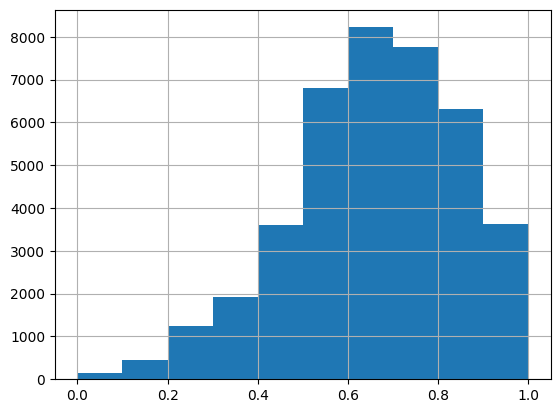

In [54]:
attend_main_df['Regular_Attendance_Rate'].describe().transpose()
attend_main_df['Regular_Attendance_Rate'].hist()

### Check 0 and 100% attendance rates

In [55]:
#check 0 and 100 attend rates
attend_main_df['Regular_Attendance_Rate'] == 0.0
attend_main_df[attend_main_df['Regular_Attendance_Rate'] == 1.0]['Year'].value_counts()
attend_main_df[attend_main_df['Regular_Attendance_Rate'] == 0.0]

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
1515,91,Male,2020-21,2021,10,0.0
1523,91,DirectCert,2020-21,2021,10,0.0
10385,43016,Military,2020-21,2021,10,0.0
14219,71173,Native,2020-21,2021,10,0.0
32065,72128,White,2019-20,2020,10,0.0
36092,38,Female,2021-22,2022,31,0.0
36239,45,Female,2021-22,2022,41,0.0


In [56]:
attend_main_df[attend_main_df['SchNumb'] < 500]

,SchNumb,Subgroup,SY,Year,Number_Attending,Regular_Attendance_Rate
0,1,All,2020-21,2021,80466,0.741900
1,1,Female,2020-21,2021,36376,0.755900
2,1,Male,2020-21,2021,37369,0.731500
3,1,White,2020-21,2021,14455,0.850200
4,1,Black,2020-21,2021,1793,0.677100
...,...,...,...,...,...,...
70922,89,Military,2023-24,2024,<NA>,NaN
70923,89,Multirace,2023-24,2024,<NA>,NaN
70924,89,Native,2023-24,2024,980,0.620408
70929,89,SwD,2023-24,2024,118,0.618644


In [57]:
filter = attend_main_df['Regular_Attendance_Rate'] > 0.99
attend_main_df[filter]['Year'].value_counts()

,count
Year,
2020,91
2021,45


array([[<Axes: title={'center': 'SchNumb'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Number_Attending'}>,
        <Axes: title={'center': 'Regular_Attendance_Rate'}>]],
      dtype=object)

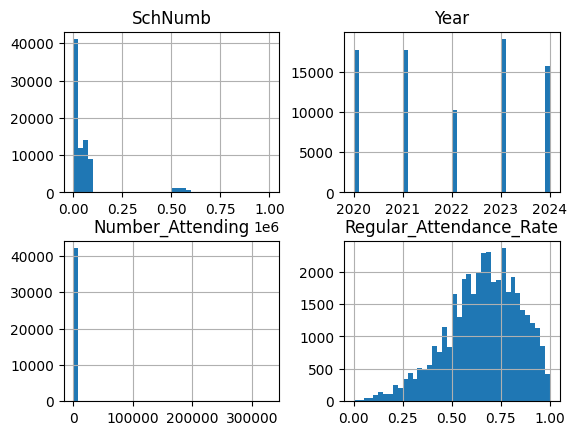

In [58]:
filter = attend_main_df['Year'] > 2021
attend_main_df.hist(bins = 40)

In [59]:
filter_schools = attend_main_df['SchNumb'].between(500,20000)
filter_dist = attend_main_df['SchNumb'] < 500
filter_state = attend_main_df['SchNumb'] > 600000

array([[<Axes: title={'center': 'SchNumb'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Number_Attending'}>,
        <Axes: title={'center': 'Regular_Attendance_Rate'}>]],
      dtype=object)

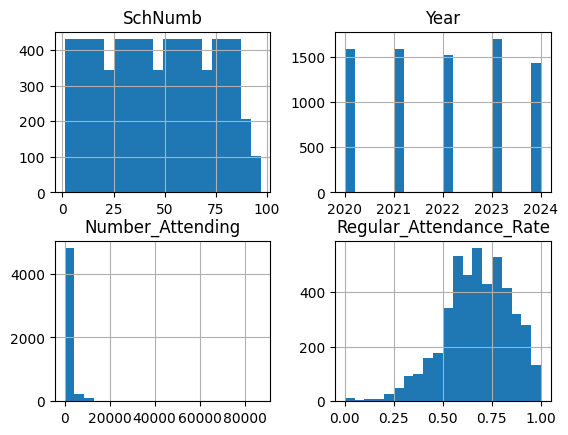

In [60]:
attend_main_df[filter_dist].hist(bins = 20)

array([[<Axes: title={'center': 'SchNumb'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Number_Attending'}>,
        <Axes: title={'center': 'Regular_Attendance_Rate'}>]],
      dtype=object)

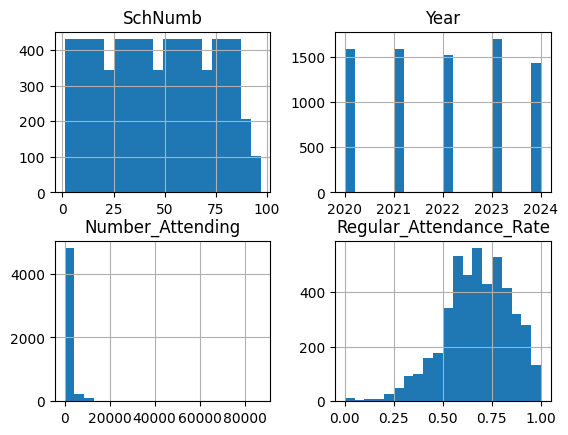

In [61]:
attend_main_df[filter_dist].hist(bins=20)

array([[<Axes: title={'center': 'SchNumb'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Number_Attending'}>,
        <Axes: title={'center': 'Regular_Attendance_Rate'}>]],
      dtype=object)

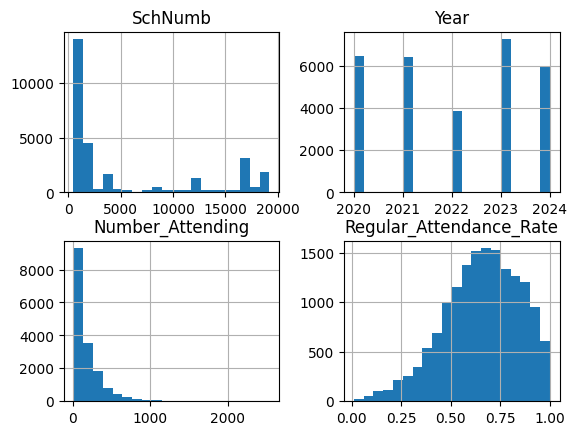

In [62]:
attend_main_df[filter_schools].hist(bins=20)

## 🟡 Graduation

In [63]:
[(k, len(v.columns)) for k,v in grad_df_dict.items()]

[('6Ygrad_2022_df', 70),
 ('5Ygrad_2022_df', 70),
 ('4Ygrad_2022_df', 70),
 ('5Ygrad_2025_df', 12),
 ('6Ygrad_2025_df', 12),
 ('4Ygrad_2025_df', 12),
 ('4Ygrad_2023_df', 72),
 ('6Ygrad_2023_df', 73),
 ('5Ygrad_2023_df', 73),
 ('4Ygrad_2020_df', 7),
 ('5Ygrad_2020_df', 7),
 ('6Ygrad_2020_df', 7),
 ('4Ygrad_2021_df', 7),
 ('5Ygrad_2021_df', 7),
 ('6Ygrad_2021_df', 7),
 ('5Ygrad_2024_df', 16),
 ('6Ygrad_2024_df', 17),
 ('4Ygrad_2024_df', 17)]

### Split into Wide and Long dataframe types

In [64]:
wide_dfs = {}
long_dfs = {}

for k, v in grad_df_dict.items():
  if len(v.columns) > 20:
    wide_dfs[k] = v
  else:
    long_dfs[k] = v

wide_dfs.keys(), long_dfs.keys()

(dict_keys(['6Ygrad_2022_df', '5Ygrad_2022_df', '4Ygrad_2022_df', '4Ygrad_2023_df', '6Ygrad_2023_df', '5Ygrad_2023_df']),
 dict_keys(['5Ygrad_2025_df', '6Ygrad_2025_df', '4Ygrad_2025_df', '4Ygrad_2020_df', '5Ygrad_2020_df', '6Ygrad_2020_df', '4Ygrad_2021_df', '5Ygrad_2021_df', '6Ygrad_2021_df', '5Ygrad_2024_df', '6Ygrad_2024_df', '4Ygrad_2024_df']))

### IDA: What is even in these tables??
Note: Grad rate seems to calculated by dividing graduates of that cohort by an *adjusted*  'number of records'

In [65]:
wide_col_df = pd.DataFrame()
for k,v in wide_dfs.items():
  wide_col_df = pd.concat([wide_col_df, pd.Series(v.columns)], axis = 1)
wide_col_df

,0,0,0,0,0,0
0,SY,SY,SY,DistCode,LongitID,LongitID
1,DistCode,DistCode,DistCode,SchNumb,DistCode,DistCode
2,SchNumb,SchNumb,SchNumb,District,SchNumb,SchNumb
3,District,District,District,School,District,District
4,School,School,School,HS,School,School
...,...,...,...,...,...,...
68,Cohort,Cohort,Cohort,NonGrads.4Y.21.Foster,NonGrads.6Y.20.Military,NonGrads.5Y.20.Military
69,Year,Year,Year,SY,NonGrads.6Y.21.Foster,NonGrads.5Y.21.Foster
70,NaN,NaN,NaN,Cohort,SY,SY
71,NaN,NaN,NaN,Year,Cohort,Cohort


In [66]:
long_col_df = pd.DataFrame()
for k,v in long_dfs.items():
  long_col_df = pd.concat([long_col_df,pd.Series(v.columns)], axis = 1)
long_col_df

,0,0,0,0,0,0,0,0,0,0,0,0
0,DistrictCode,DistrictCode,DistrictCode,SchNumb,SchNumb,SchNumb,SchNumb,SchNumb,SchNumb,AGAID,NCES_SCHID,NCES_SCHID
1,DistrictName,DistrictName,DistrictName,Year,Year,Year,Year,Year,Year,schnumb,AGAID,AGAID
2,SchoolCode,SchoolCode,SchoolCode,Subgroup,Subgroup,Subgroup,Subgroup,Subgroup,Subgroup,DistrictCode,schnumb,schnumb
3,SchoolName,SchoolName,SchoolName,Grads,Grads,Grads,Grads,Grads,Grads,DistrictName,DistrictCode,DistrictCode
4,Group,Group,Group,GradRate,GradRate,GradRate,GradRate,GradRate,GradRate,SchoolCode,DistrictName,DistrictName
5,Cohort,Cohort,Cohort,SY,SY,SY,SY,SY,SY,SchoolName,SchoolCode,SchoolCode
6,Total_Records,Total_Records,Total_Records,Cohort,Cohort,Cohort,Cohort,Cohort,Cohort,Group,SchoolName,SchoolName
7,Numerator,Numerator,Numerator,NaN,NaN,NaN,NaN,NaN,NaN,Numerator,Group,Group
8,Denominator,Denominator,Denominator,NaN,NaN,NaN,NaN,NaN,NaN,Denominator,Numerator,Numerator
9,GradRate,GradRate,GradRate,NaN,NaN,NaN,NaN,NaN,NaN,Total_Records,Denominator,Denominator


In [67]:
keep_cols = [
    'schnumb',
    'SchoolName',
    'Group',
    'GradRate',
    'SY',
    'Cohort',
    'Year',
    ]

col_rename_dict = {}

In [68]:
grad_df_dict['4Ygrad_2020_df']
# grad_df_dict['4Ygrad_2021_df']
# grad_df_dict['4Ygrad_2022_df']
# grad_df_dict['4Ygrad_2023_df']
# grad_df_dict['4Ygrad_2024_df']
grad_df_dict['4Ygrad_2025_df']

,DistrictCode,DistrictName,SchoolCode,SchoolName,Group,Cohort,Total_Records,Numerator,Denominator,GradRate,SY,Year
0,999,New Mexico,999,StateWide,All,4Y,26089,20309.00,26089.00,77.85,2024-25,2025
1,999,New Mexico,999,StateWide,Male,4Y,12941,9694.00,12941.00,74.91,2024-25,2025
2,999,New Mexico,999,StateWide,Female,4Y,12748,10283.00,12748.00,80.66,2024-25,2025
3,999,New Mexico,999,StateWide,African American,4Y,639,439.00,639.00,68.70,2024-25,2025
4,999,New Mexico,999,StateWide,Caucasian,4Y,5583,4483.00,5583.00,80.30,2024-25,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
5200,585,VISTA GRANDE HIGH SCHOOL,1,VISTA GRANDE HIGH SCHOOL,Homeless_Status_Code,4Y,*,*,*,*,2024-25,2025
5201,585,VISTA GRANDE HIGH SCHOOL,1,VISTA GRANDE HIGH SCHOOL,Economically_Disadvantage_Status,4Y,22,8.25,17.10,48.25,2024-25,2025
5202,585,VISTA GRANDE HIGH SCHOOL,1,VISTA GRANDE HIGH SCHOOL,MILITARY_FAMILY_CD1,4Y,15,9.50,12.27,77.45,2024-25,2025
5203,585,VISTA GRANDE HIGH SCHOOL,1,VISTA GRANDE HIGH SCHOOL,NotDirectCert,4Y,*,*,*,*,2024-25,2025


# ❗ School Directory update

In [69]:
school_direct_url = 'https://github.com/DS-17-Projects-Tracking/NMPEDdata/raw/refs/heads/main/school_directory.csv'
school_dir_df = pd.read_csv(school_direct_url)

In [70]:
school_dir_df

,ID,SchoolName,District,Level
0,1,albuquerque district,albuquerque,district
1,2,reserve district,reserve,district
2,3,quemado district,quemado,district
3,4,roswell district,roswell,district
4,5,hagerman district,hagerman,district
...,...,...,...,...
979,583001,rio grande academy of fine arts,rio grande academy of fine arts,unknown level
980,584001,pecos cyber academy,pecos cyber academy,unknown level
981,585001,vista grande high school,vista grande high school,hs
982,586001,NaN,explore academy - rio rancho,unknown level


In [71]:
attend_df_dict['attend_2024_df']

,SY2024_Accountable_Entity,Disnum,SchNumb,District,School,AttendRate_All,AttendRate_Female,AttendRate_Male,AttendRate_Hispanic,AttendRate_White,...,NChronicRate_NotSwD,NChronicRate_EL,NChronicRate_NotEL,NChronicRate_Migrant,NChronicRate_Homeless,NChronicRate_Military,NChronicRate_Any_Native,NChronicRate_Any_Black,SY,Year
0,1,1.0,NaN,ALBUQUERQUE,ALBUQUERQUE DISTRICT,0.846526,0.844665,0.848330,0.833226,0.847264,...,25156,10037,23156,*****,1369,*****,3925,2627,2023-24,2024
1,2,2.0,NaN,RESERVE,RESERVE DISTRICT,0.974641,0.979864,0.970723,0.978792,0.974798,...,*****,*****,*****,*****,*****,*****,*****,*****,2023-24,2024
2,3,3.0,NaN,QUEMADO,QUEMADO DISTRICT,0.906697,0.906010,0.907334,0.901142,0.909998,...,41,*****,*****,*****,19,*****,*****,*****,2023-24,2024
3,4,4.0,NaN,ROSWELL,ROSWELL DISTRICT,0.900672,0.898900,0.902396,0.896231,0.879841,...,2481,464,2622,8,44,7,10,43,2023-24,2024
4,5,5.0,NaN,HAGERMAN,HAGERMAN DISTRICT,0.938024,0.939056,0.937332,0.937753,0.937678,...,36,13,31,*****,*****,*****,*****,*****,2023-24,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,583001,NaN,583001.0,RIO GRANDE ACADEMY OF FINE ARTS,RIO GRANDE ACADEMY OF FINE ARTS,0.971200,0.971174,0.971239,0.967487,0.969198,...,7,*****,*****,*****,*****,*****,*****,*****,2023-24,2024
980,584001,NaN,584001.0,PECOS CYBER ACADEMY,PECOS CYBER ACADEMY,0.938199,0.933864,0.943426,0.934788,0.937826,...,204,22,242,*****,*****,*****,32,16,2023-24,2024
981,585001,NaN,585001.0,VISTA GRANDE HIGH SCHOOL,VISTA GRANDE HIGH SCHOOL,0.949261,0.943182,0.958015,0.951278,0.953215,...,*****,*****,*****,*****,*****,*****,*****,*****,2023-24,2024
982,586001,NaN,586001.0,EXPLORE ACADEMY - RIO RANCHO,NaN,0.939176,0.940566,0.938136,0.937193,0.937670,...,33,*****,*****,*****,*****,*****,*****,*****,2023-24,2024


# Export dataframes to github

In [72]:
attend_main_df.to_json('MAIN_attendance_2019_2024.json')